### Importing liabraries

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
from collections import Counter
from plotly.subplots import make_subplots


### Retrieving Data

In [3]:
netflix=pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.shape

(8807, 12)

In [5]:
netflix=netflix.drop(['director','cast'],axis=1)
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


let's see the breakdown over the years. we will use the date that it was added to netflix.

In [6]:
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['date_added_year']=pd.DatetimeIndex(netflix['date_added']).year
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [8]:
netflix['country'].isna().sum()

831

In [9]:
netflix_country=netflix[netflix['country'].isna()==False]
netflix_country['country'].isna().sum()


0

In [10]:
g=netflix_country.groupby('country').agg({'country':'count'})
g.apply(lambda x: x.sort_values(ascending=False)).head()

,country
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


In the sense that some shows and movies might have been produced or filmed over several countries.BUt for the sake of this we will keep it as it is since the top few countries are what we want to focus on and that tneo thers will jsut add to this top few count.

So as we can see US, india, Uk, japan and sk are the ones where alot of them are proeuced. US will obviously have the highest. But let;s take a closer look in terms of netflix bringing more shows and movies form non english speaking areas. For this. let;s remove the shows procuded in US and UK and see what happens.

In [11]:
netflix_country=netflix_country[netflix_country['country']!='United States']
netflix_country=netflix_country[netflix_country['country']!='United Kingdom']


g_2=netflix_country.groupby('country').agg({'country':'count'})
g_2.apply(lambda x: x.sort_values(ascending=False)).head()

,country
country,
India,972
Japan,245
South Korea,199
Canada,181
Spain,145


Won't take out Canada as it might contain french movies as well. Ok now let;' see how the trends have been over the years.

<AxesSubplot:xlabel='date_added_year'>

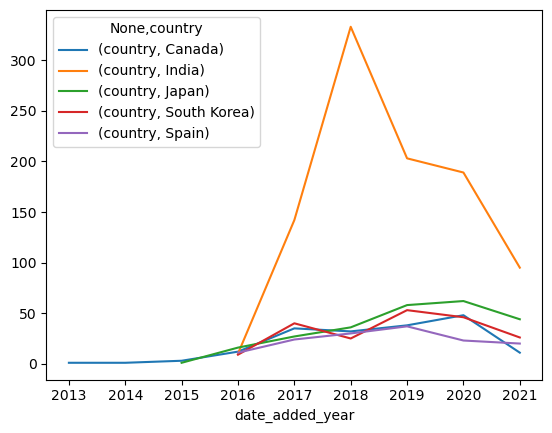

In [12]:
netflix_country_final=netflix_country[netflix_country['country'].isin(['India','Japan','South Korea','Canada','Spain'])]
netflix_country_final.groupby(['date_added_year','country']).agg({'country':'count'}).unstack().plot(kind = "line")

While india saw a boom after 2016, the other 4 countries did see a bit of an incraase too over time. however, not as much as we might have expected. nonetheless it looks like netflix is slowly increasing their number of foriegn filksm over time.

Let's now look at the trend of when do shows and movies get released.



In [13]:
#create a new month variable
netflix['month']=pd.DatetimeIndex(netflix['date_added']).month
netflix.head()
#plt.scatter(netflix['date_added_year'], netflix['month'], marker='o')
netflix.groupby(['date_added_year','month']).agg({'month':'count'}).unstack()

month                                                   \
month             1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    
date_added_year                                                           
2008.0             1.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2009.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2010.0             NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011.0             NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN   
2012.0             NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
2013.0             NaN    NaN    1.0    NaN    NaN    NaN    NaN    1.0   
2014.0             2.0    2.0    NaN    2.0    NaN    1.0    1.0    1.0   
2015.0             1.0    4.0    5.0    5.0    6.0    6.0    7.0    2.0   
2016.0            43.0   15.0   17.0   22.0   13.0   18.0   28.0   34.0   
2017.0            72.0   82.0  125.0   93.0   86.0   94.0   79.0  115.0   
2018.0           129.0   87.0  173.0  115.0   97.0   78.0  152.0  164.0   
2019.0           153.0  148.0  172.0  162.0  139.0  168.0  157.0  131.0   
2020.0           205.0  114.0  137.0  177.0  157.0  156.0  146.0  129.0   
2021.0           132.0  109.0  112.0  188.0  132.0  207.0  257.0  178.0   

                                             
month             9.0    10.0   11.0   12.0  
date_added_year                              
2008.0             NaN    NaN    NaN    NaN  
2009.0             NaN    NaN    1.0    NaN  
2010.0             NaN    NaN    1.0    NaN  
2011.0             1.0   11.0    NaN    NaN  
2012.0             NaN    NaN    1.0    1.0  
2013.0             2.0    3.0    2.0    2.0  
2014.0             1.0    4.0    4.0    6.0  
2015.0             7.0   14.0    4.0   21.0  
2016.0            48.0   51.0   44.0   96.0  
2017.0           113.0  126.0   85.0  118.0  
2018.0           124.0  191.0  154.0  185.0  
2019.0           123.0  193.0  255.0  215.0  
2020.0           168.0  167.0  154.0  169.0  
2021.0           183.0    NaN    NaN    NaN

From this we can see that it is quite varied, but the general trend is thatm ost shows and movies thend to get released at the later part of the year.

Now let's look the proportion at which netflix brings back old shows. 

In [14]:
#we see if there is a difference between the year of the releas of the movie/tv show and the year it was added to netflix 
netflix['diff_year']=netflix['date_added_year']-netflix['release_year']
netflix[netflix['diff_year']>0]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,month,diff_year
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,1.0
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,28.0
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021.0,9.0,1.0
17,s18,TV Show,Falsa identidad,Mexico,2021-09-22,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,2021.0,9.0,1.0
21,s22,TV Show,Resurrection: Ertugrul,Turkey,2021-09-22,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2021.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,12.0
8803,s8804,TV Show,Zombie Dumb,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,1.0
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,10.0
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,14.0


What's interesting is that there is a huge proportion (more than 5000) of old shows/movies being brought into netflix. most likley this does not incluide the netflix originals either.

Let's move on to genres. As there are more than one genre per movie/show, we should try and break it down indivudally and see what are the popular ones.

In [15]:
netflix_genre=list(netflix['listed_in'])

empty=[]


for x in netflix_genre:
    temp=x.split(', ')
    for y in temp:
        empty.append(y)

empty=pd.DataFrame(empty)
empty.columns=['genre']
group=empty.groupby('genre').agg({'genre':'count'})
group.apply(lambda x: x.sort_values(ascending=False))

,genre
genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


# Heatmap

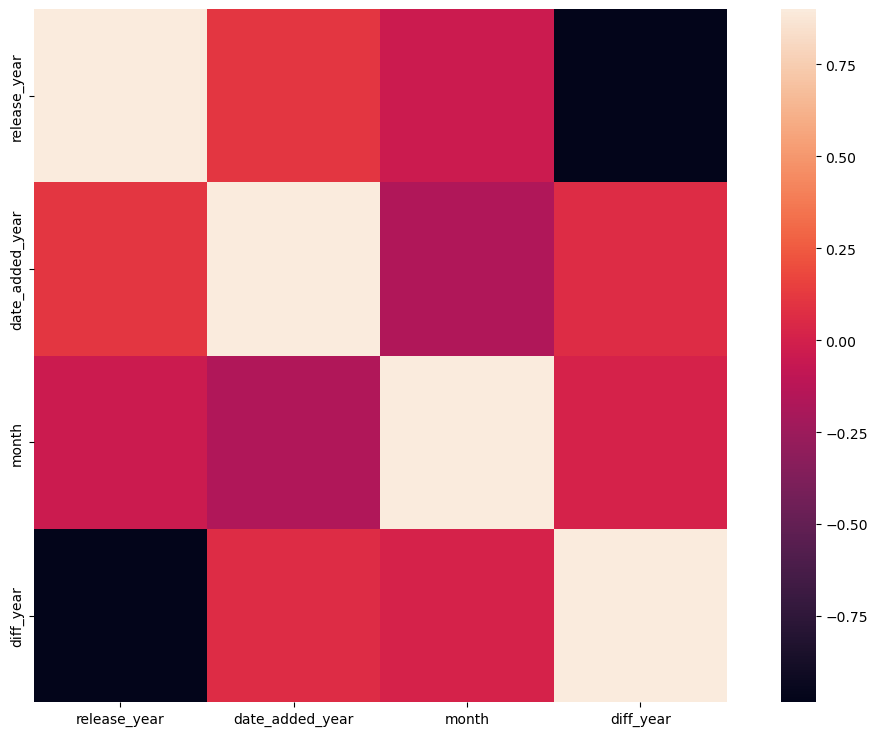

                 release_year  date_added_year     month  diff_year
release_year         1.000000         0.111531 -0.039179  -0.984024
date_added_year      0.111531         1.000000 -0.160421   0.067178
month               -0.039179        -0.160421  1.000000   0.010596
diff_year           -0.984024         0.067178  0.010596   1.000000


In [17]:
correlation_metrics = netflix.corr()
fig = plt.figure(figsize = (14, 9))
sns.heatmap(correlation_metrics, vmax = .9, square = True) #annot = value
plt.show()
print(correlation_metrics)

[]

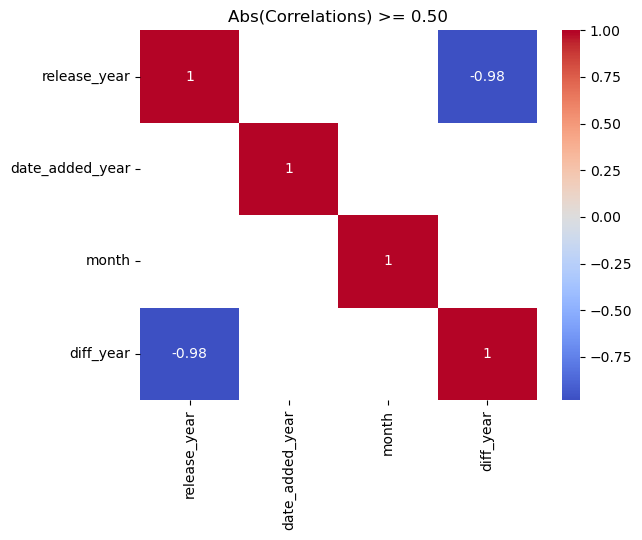

In [49]:
_ = sns.heatmap(netflix.corr().round(2)[abs(netflix.corr().round(2)) >= 0.50] \
                    .dropna(how='all').dropna(axis='columns', how='all'), 
                center=0, cmap='coolwarm', annot=True, xticklabels=True, yticklabels=True)

plt.title('Abs(Correlations) >= 0.50')

plt.plot()

<AxesSubplot:xlabel='rating', ylabel='duration'>

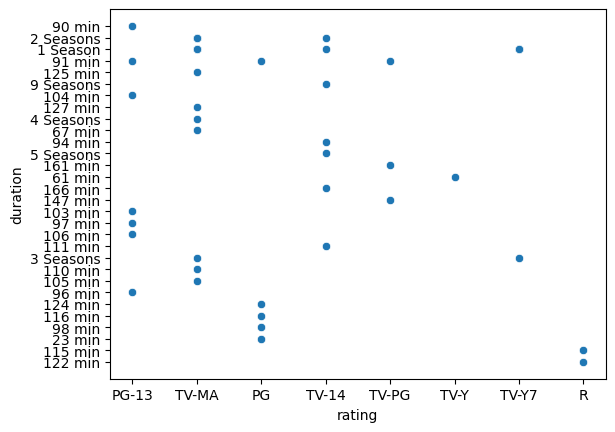

In [60]:
sns.scatterplot(
    x='rating',
    y='duration', 
    data= netflix.head(50))
    

<AxesSubplot:xlabel='rating', ylabel='release_year'>

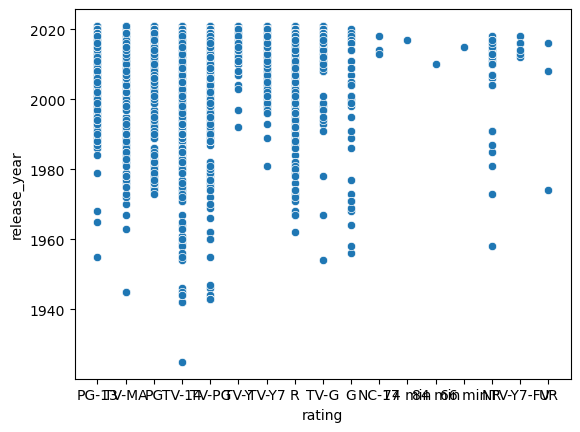

In [50]:
sns.scatterplot(
    x='rating',
    y='release_year', 
    data=netflix)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
netflix_data = netflix.copy()
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['description'] = netflix_data['description'].fillna('')
tfidf_matrix=tfidf.fit_transform(netflix_data['description'])

In [25]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [31]:
indices=pd.Series(netflix_data.index,index=netflix_data['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [32]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data[['title','description']].iloc[movie_indices]

In [33]:
get_recommendations('Sankofa')

,title,description
8353,The Hunt,Witness some of the most riveting showdowns in...
7037,I Am Jane Doe,This intense documentary follows real cases of...
5580,One More Time,This fantasy drama follows an indie band singe...
5653,My Runway,An egotistic top male model and a pretty model...
3619,I'm Brent Morin,"In a witty solo show, Brent Morin serves up in..."
2824,The Valhalla Murders,An Oslo detective with a painful past returns ...
4056,Losers,"In a ""winning is everything"" society, how do w..."
5044,When We First Met,Using a magical photo booth that sends him bac...
5013,Something Huge,"A director and a comedian want to shoot the ""c..."
7700,Palm Trees in the Snow,"Finding a tantalizing clue in an old letter, a..."
